## Analysis Script

In [43]:
# libraries
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go


sns.set_theme(style="darkgrid")

data_path = os.getcwd()
print(data_path)

# Load data from file
aw = pd.read_csv("Datensatz/Alterswohnung/data/stzh.poi_alterswohnung_view.csv") # load from file
bn = pd.read_csv("Datensatz/Bevölkerung nach Nationalität und Stadtquartier/BEV336OD3361.csv") # load from file
ba = pd.read_csv("Datensatz/Bevölkerung nach Stadtquartier, Herkunft, Geschlecht und Alter/BEV390OD3903.csv") # load from file
bo = pd.read_csv("Datensatz/Bodennutzung/BAU612OD6120.csv") # load from file

/Users/Zita/switchdrive/ageing_zurich/ageing_zurich


In [4]:
aw.head()

,adr_inter,adresse,adrzus_int,behindertenparkplatz,bemerkung,ccmail,da,datum,datum_cms,dep,...,suchen,tel,tel2,www,zahlungsmittel_internet,zahlungsmittel_schalter,zahlungsmittel_telefon,zvv_label,zvv_link,geometry
0,Werkgasse 6,Seefeldstrasse 50,Seefeldstrasse 50 + 52,NaN,NaN,NaN,Stiftung Alterswohnungen der Stadt Zürich,202003161721,NaN,Gesundheits- und Umweltdepartement (GUD),...,Alterswohnungen,NaN,NaN,http://www.wohnenab60.ch/,NULL;NULL;NULL,NULL;NULL;NULL,NULL;NULL;NULL,Seefeldstrasse 50,https://online.fahrplan.zvv.ch/bin/query.exe/d...,POINT (2683960 1246350.9)
1,Glattalstrasse 1 + 3 + 7,NaN,NaN,NaN,NaN,NaN,Stiftung Alterswohnungen der Stadt Zürich,202003161721,NaN,Gesundheits- und Umweltdepartement (GUD),...,Alterswohnungen,NaN,NaN,http://www.wohnenab60.ch/,NULL;NULL;NULL,NULL;NULL;NULL,NULL;NULL;NULL,"Zürich, Seebach",https://online.fahrplan.zvv.ch/bin/query.exe/d...,POINT (2683862 1253003.9)
2,NaN,Traktorenstrasse,NaN,NaN,NaN,NaN,Stiftung Alterswohnungen der Stadt Zürich,202003161721,NaN,Gesundheits- und Umweltdepartement (GUD),...,Alterswohnungen,NaN,NaN,http://www.wohnenab60.ch/koeschenrueti_saw,NULL;NULL;NULL,NULL;NULL;NULL,NULL;NULL;NULL,NaN,NaN,POINT (2682913 1253723.9)
3,NaN,Oberdorfstrasse 36,NaN,NaN,NaN,NaN,Stiftung Alterswohnungen der Stadt Zürich,202003161721,NaN,Gesundheits- und Umweltdepartement (GUD),...,Alterswohnungen,NaN,NaN,http://www.wohnenab60.ch/,NaN,NaN,NaN,Oberdorfstrasse 36,https://online.fahrplan.zvv.ch/bin/query.exe/d...,POINT (2683528 1247120.9)
4,NaN,Hegianwandweg 22 + 24,NaN,NaN,NaN,NaN,Stiftung Alterswohnungen der Stadt Zürich,202003161721,NaN,Gesundheits- und Umweltdepartement (GUD),...,Alterswohnungen,NaN,NaN,http://www.wohnenab60.ch/,NaN,NaN,NaN,Hegianwandweg 22 + 24,https://online.fahrplan.zvv.ch/bin/query.exe/d...,POINT (2681156 1245839.9)


In [8]:
bn.head()

,StichtagDatJahr,QuarSort,QuarCd,QuarLang,NationHistSort,NationHistLang,NationSort,NationLang,RegionSort,RegionLang,KontinentSort,KontinentLang,AnzBestWir
0,1993,11,11,Rathaus,8100,Schweiz,8100,Schweiz,13,Zentraleuropa,1,Europa,2487
1,1993,11,11,Rathaus,8205,Bulgarien,8205,Bulgarien,17,Südosteuropa,1,Europa,1
2,1993,11,11,Rathaus,8206,Dänemark,8206,Dänemark,11,Nordeuropa,1,Europa,2
3,1993,11,11,Rathaus,8207,Deutschland,8207,Deutschland,13,Zentraleuropa,1,Europa,96
4,1993,11,11,Rathaus,8211,Finnland,8211,Finnland,11,Nordeuropa,1,Europa,2


In [9]:
ba.head()

,StichtagDatJahr,QuarSort,QuarCd,QuarLang,AlterVSort,AlterVCd,AlterVKurz,AlterV05Sort,AlterV05Kurz,HerkunftLang,HerkunftCd,HerkunftSort,SexCd,SexKurz,AnzBestWir
0,1993,11,11,Rathaus,0,0,0,1,0-4,Schweizer/in,1,1,1,M,11
1,1993,11,11,Rathaus,0,0,0,1,0-4,Schweizer/in,1,1,2,W,8
2,1993,11,11,Rathaus,0,0,0,1,0-4,Ausländer/in,2,2,1,M,1
3,1993,11,11,Rathaus,0,0,0,1,0-4,Ausländer/in,2,2,2,W,6
4,1993,11,11,Rathaus,1,1,1,1,0-4,Schweizer/in,1,1,1,M,11


In [10]:
bo.head()

,StichtagDatJahr,QuarSort,QuarLang,BodenbedeckungsartLevel1Sort,BodenbedeckungsartLevel1Lang,BodenbedeckungsartLevel2Sort,BodenbedeckungsartLevel2Lang,BodenbedeckungsartLevel3Sort,BodenbedeckungsartLevel3Lang,BodenbedeckungsartLevel4Sort,BodenbedeckungsartLevel4Lang,EigentuemerLevel1Sort,EigentuemerLevel1Lang,EigentuemerLevel2Sort,EigentuemerLevel2Lang,EigentuemerLevel3Sort,EigentuemerLevel3Lang,EigentuemerLevel4Sort,EigentuemerLevel4Lang,Flaeche
0,2009,11,Rathaus,110101,Gebäude öffentlich,1101,Gebäude,11,Gebäude,1,Landfläche ohne Wald,110101,Einzelperson,1101,Einzelperson,110,Natürliche Personen,1,Privates Eigentum,0.4483
1,2009,11,Rathaus,110101,Gebäude öffentlich,1101,Gebäude,11,Gebäude,1,Landfläche ohne Wald,110201,Erbengemeinschaft,1102,Erbengemeinschaft,110,Natürliche Personen,1,Privates Eigentum,0.1171
2,2009,11,Rathaus,110101,Gebäude öffentlich,1101,Gebäude,11,Gebäude,1,Landfläche ohne Wald,110301,Mehrere Natürliche Personen,1103,Mehrere Natürliche Personen,110,Natürliche Personen,1,Privates Eigentum,0.1154
3,2009,11,Rathaus,110101,Gebäude öffentlich,1101,Gebäude,11,Gebäude,1,Landfläche ohne Wald,120401,Stockwerkeigentum,1204,Stockwerkeigentum,120,Stockwerkeigentum,1,Privates Eigentum,0.1343
4,2009,11,Rathaus,110101,Gebäude öffentlich,1101,Gebäude,11,Gebäude,1,Landfläche ohne Wald,140101,Handels- und Produktivgenossenschaft,1401,Genossenschaft,140,Genossenschaften,1,Privates Eigentum,0.0185


In [40]:
bn_2020 = bn[(bn.StichtagDatJahr == 2020)]
bn_2020.head()

bn_2020[["QuarCd", "NationLang"]].groupby("NationLang").count()

,QuarCd
NationLang,
Afghanistan,30
Albanien,27
Algerien,28
Angola,24
Argentinien,30
...,...
Zentralafrikanische Republik,6
Zypern,30
Ägypten,32


35     136
34     136
37     136
45     136
27     136
      ... 
103      6
104      3
105      2
107      1
106      1
Name: AlterVKurz, Length: 108, dtype: int64


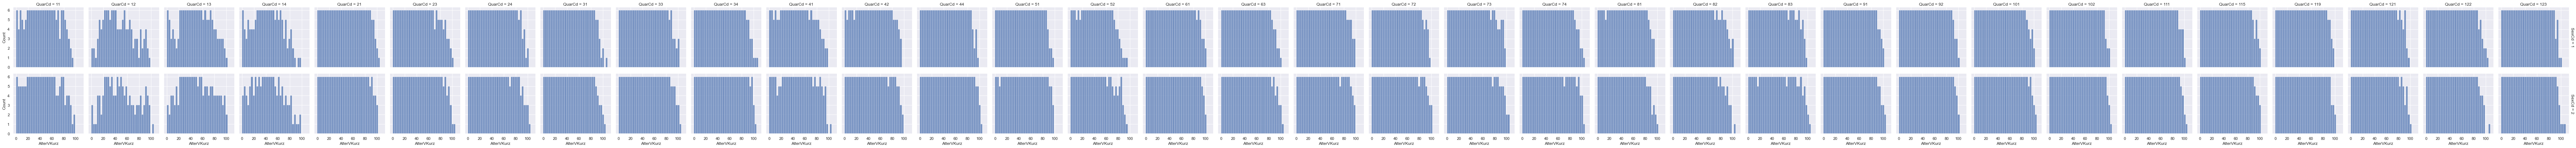

NameError: name 'QuarCd' is not defined

In [45]:
ba_2020 = ba[(ba.StichtagDatJahr == 2020)]
ba_2020.head()

#ba_2020.groupby('QuarCd')['AlterVKurz'].describe()
ba_2020[["QuarCd", "AlterVKurz"]].groupby("QuarCd").describe()


age = ba_2020['AlterVKurz'].value_counts()
print(age)


# multiplot

sns.displot(
    ba_2020, x="AlterVKurz", col="QuarCd", row="SexCd",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

plt.show()

In [48]:
# heatmap

distribution_dict = {}
for index, row in ba_2020.iterrows():
    if distribution_dict.get(row["QuarCd"]):
        if distribution_dict[row["QuarCd"]].get(row["AlterVKurz"]):
            distribution_dict[row["QuarCd"]][row["AlterVKurz"]] += 1
        else:
            distribution_dict[row["QuarCd"]][row["AlterVKurz"]] = 1
    else:
        distribution_dict[row["QuarCd"]] = {}
        distribution_dict[row["QuarCd"]][row["AlterVKurz"]] = 1

age_groups = ['11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
city_parts = list(range(1,34))

full_list = []
for key, value in enumerate(city_parts):
    intermediate_list = []
    for k,v in enumerate(age_groups):
        if distribution_dict[value].get(v):
            intermediate_list.append(distribution_dict[value][v])
    full_list.append(intermediate_list)


fig = go.Figure(data=go.Heatmap(
                   z=full_list,
                   x=age_groups,
                   y=city_parts,
                   hoverongaps = False,
                   colorscale='Viridis'))
fig.show()

KeyError: 1